In [1]:
import importlib
import sys
sys.path.append("./..")

import numpy as np
import pandas as pd

from tigramite.toymodels import structural_causal_processes as toys

import data_structures.causal_graph as causal_graph
import data_structures.dataloader as dataloader

/opt/anaconda3/envs/tigramite/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
importlib.reload(causal_graph)
importlib.reload(dataloader)


<module 'data_structures.dataloader' from '/Users/oanapopescu/Documents/repos/causal_effects/running/./../data_structures/dataloader.py'>

In [3]:
graph =  np.array([['', '-->', '', '', '', '', ''],
                   ['<--', '', '-->', '-->', '', '<--', ''],
                   ['', '<--', '', '-->', '', '<--', ''],
                   ['', '<--', '<--', '', '<->', '', '<--'],
                   ['', '', '', '<->', '', '<--', ''],
                   ['', '-->', '-->', '', '-->', '', ''],
                   ['', '', '', '-->', '', '', '']], dtype='<U3')

A = [(0,0), (1,0)]
Y = [(3,0)]
var_names = ['$X_1$', '$X_2$', '$M$', '$Y$', '$Z_1$', '$Z_2$', '$Z_3$']

In [4]:
def lin_f(x): return x
coeff = .5
links_coeffs = {
                0: [], 
                1: [((0, 0), coeff, lin_f), ((5, 0), coeff, lin_f)], 
                2: [((1, 0), coeff, lin_f), ((5, 0), coeff, lin_f)],
                3: [((1, 0), coeff, lin_f), ((2, 0), coeff, lin_f), ((6, 0), coeff, lin_f), ((7, 0), coeff, lin_f)],
                4: [((5, 0), coeff, lin_f), ((7, 0), coeff, lin_f)], 
                5: [],
                6: [],
                7: [],
                }
T = 10000
data, nonstat = toys.structural_causal_process(links_coeffs, T=T, noises=None, seed=7)
# Time series no 7 is unobserved confounder
data = data[:, [0,1,2,3,4,5,6]]

In [5]:
pd_data = pd.DataFrame(data, columns=var_names)

In [6]:
data

array([[-0.07555974,  0.40176892,  0.4497183 , ..., -1.2883053 ,
        -1.1230942 ,  0.97366697],
       [ 0.5089432 ,  1.4215627 ,  1.6405787 , ...,  1.2745411 ,
         0.23725803, -0.50111544],
       [-0.79693705, -1.6009941 , -1.9884402 , ..., -0.91217434,
        -1.0188439 ,  0.05527882],
       ...,
       [ 0.18403228,  0.4748602 ,  0.89744425, ..., -0.5247874 ,
         1.1523318 ,  0.16023226],
       [-0.5298535 ,  0.5795682 , -0.02101113, ..., -0.60473067,
        -0.28284106, -0.23398559],
       [ 0.23268819, -1.3207252 ,  0.10700685, ...,  1.1982833 ,
         0.6719095 , -0.7142934 ]], shape=(10000, 7), dtype=float32)

In [7]:
graph.shape

In [8]:
cg = causal_graph.CausalGraph('ADMG', graph, var_names)

In [9]:
nx_graph = cg.to_networkx()

In [10]:
A = [(1, 0)]
Y = [(3, 0)]

In [11]:
model = dataloader.DataLoader(pd_data, cg)

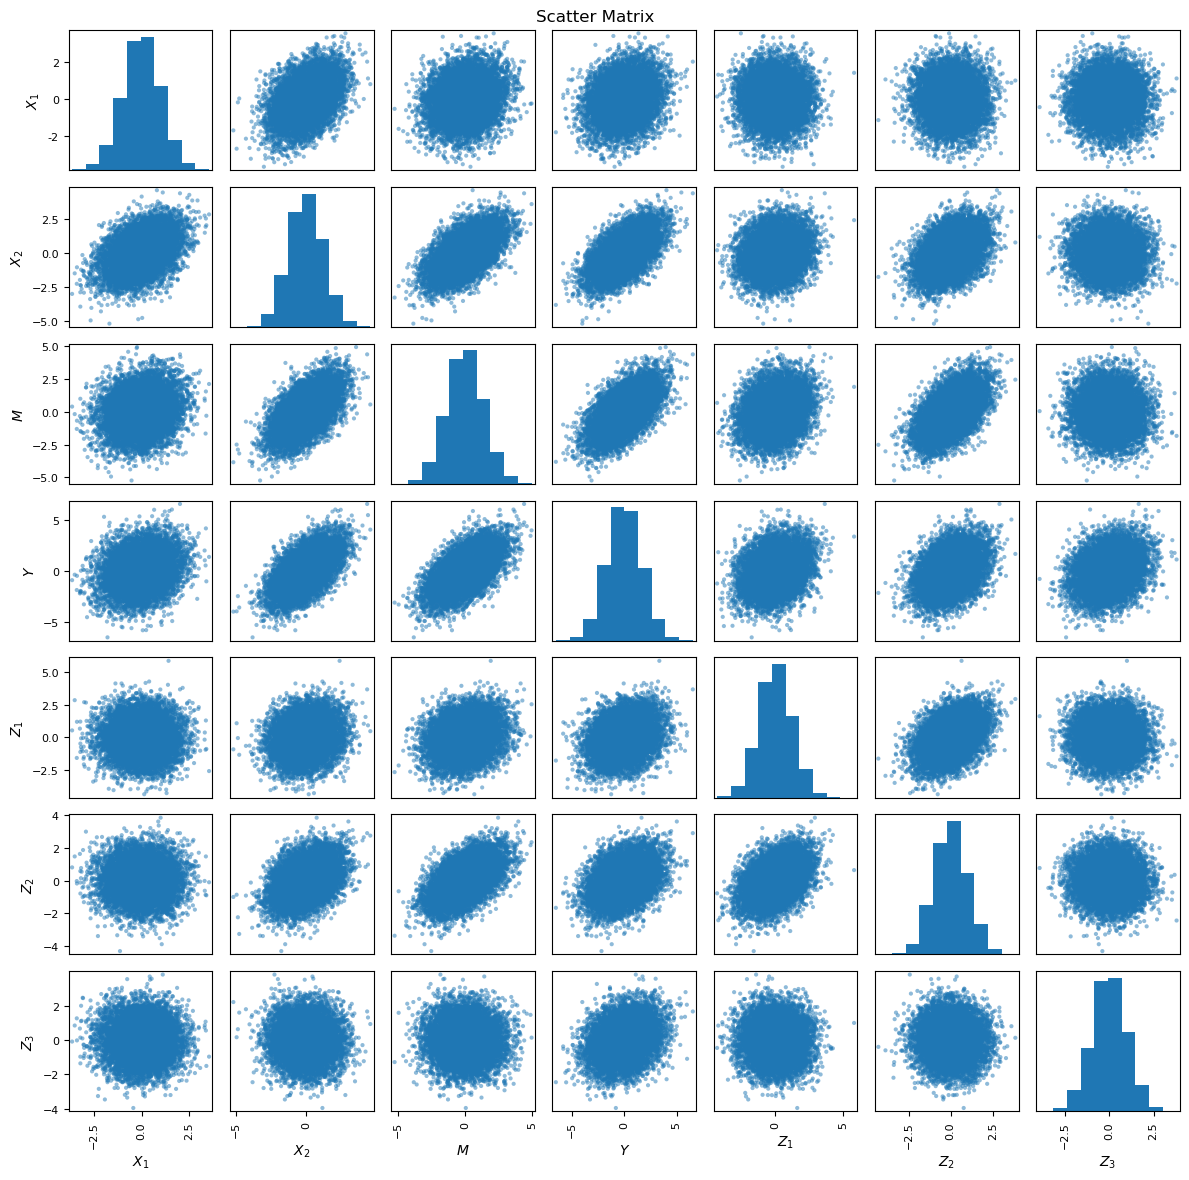

In [12]:
model.plot_scatter_matrix()

In [14]:

parents = cg.get_parents('$Y$')

In [15]:
parents

['$X_2$', '$M$', '$Z_3$']

In [ ]:
tig_causal_effects = model.tigramite_causal_effects(A, Y, method='linear', n_boot=1000, alpha=0.05)